In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from scipy import stats
import requests
import pickle
import joblib
import warnings
warnings.filterwarnings("ignore")





# **1: Data Preprocessing**

In [2]:

# shared link
shared_link = 'https://drive.google.com/file/d/1OnL716JwepujJ9_31s-fDPKfUii4dfGV/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('HP Stock.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('HP Stock.csv')
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.131273,0.131273,0.124177,0.124177,0.006887,2480300
1,1962-01-03,0.124177,0.124177,0.121516,0.122846,0.006813,507300
2,1962-01-04,0.122846,0.126838,0.117968,0.120185,0.006666,845500
3,1962-01-05,0.119742,0.119742,0.117525,0.117525,0.006518,338200
4,1962-01-08,0.117525,0.119299,0.115307,0.119299,0.006617,873700
5,1962-01-09,0.119299,0.124177,0.117968,0.121072,0.006715,930100
6,1962-01-10,0.121072,0.121959,0.119299,0.121959,0.006764,450900
7,1962-01-11,0.121959,0.122403,0.120629,0.121516,0.006740,422700
8,1962-01-12,0.121516,0.123290,0.120629,0.120629,0.006691,535500
9,1962-01-15,0.120629,0.121072,0.118855,0.118855,0.006592,310000


In [3]:
print("Overview of the features and their types:")
data.info()

Overview of the features and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14663 entries, 0 to 14662
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14663 non-null  object 
 1   Open       14663 non-null  float64
 2   High       14663 non-null  float64
 3   Low        14663 non-null  float64
 4   Close      14663 non-null  float64
 5   Adj Close  14663 non-null  float64
 6   Volume     14663 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 802.0+ KB


In [4]:
# Check for missing values
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.131273,0.131273,0.124177,0.124177,0.006887,2480300
1962-01-03,0.124177,0.124177,0.121516,0.122846,0.006813,507300
1962-01-04,0.122846,0.126838,0.117968,0.120185,0.006666,845500
1962-01-05,0.119742,0.119742,0.117525,0.117525,0.006518,338200
1962-01-08,0.117525,0.119299,0.115307,0.119299,0.006617,873700


In [6]:

# Check for duplicates
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows found:
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
1964-10-13  0.069184  0.069628  0.069184  0.069184   0.003837  535500
1964-10-20  0.069184  0.069628  0.069184  0.069184   0.003837  535500


# **2: Exploratory Data Analysis (EDA)**

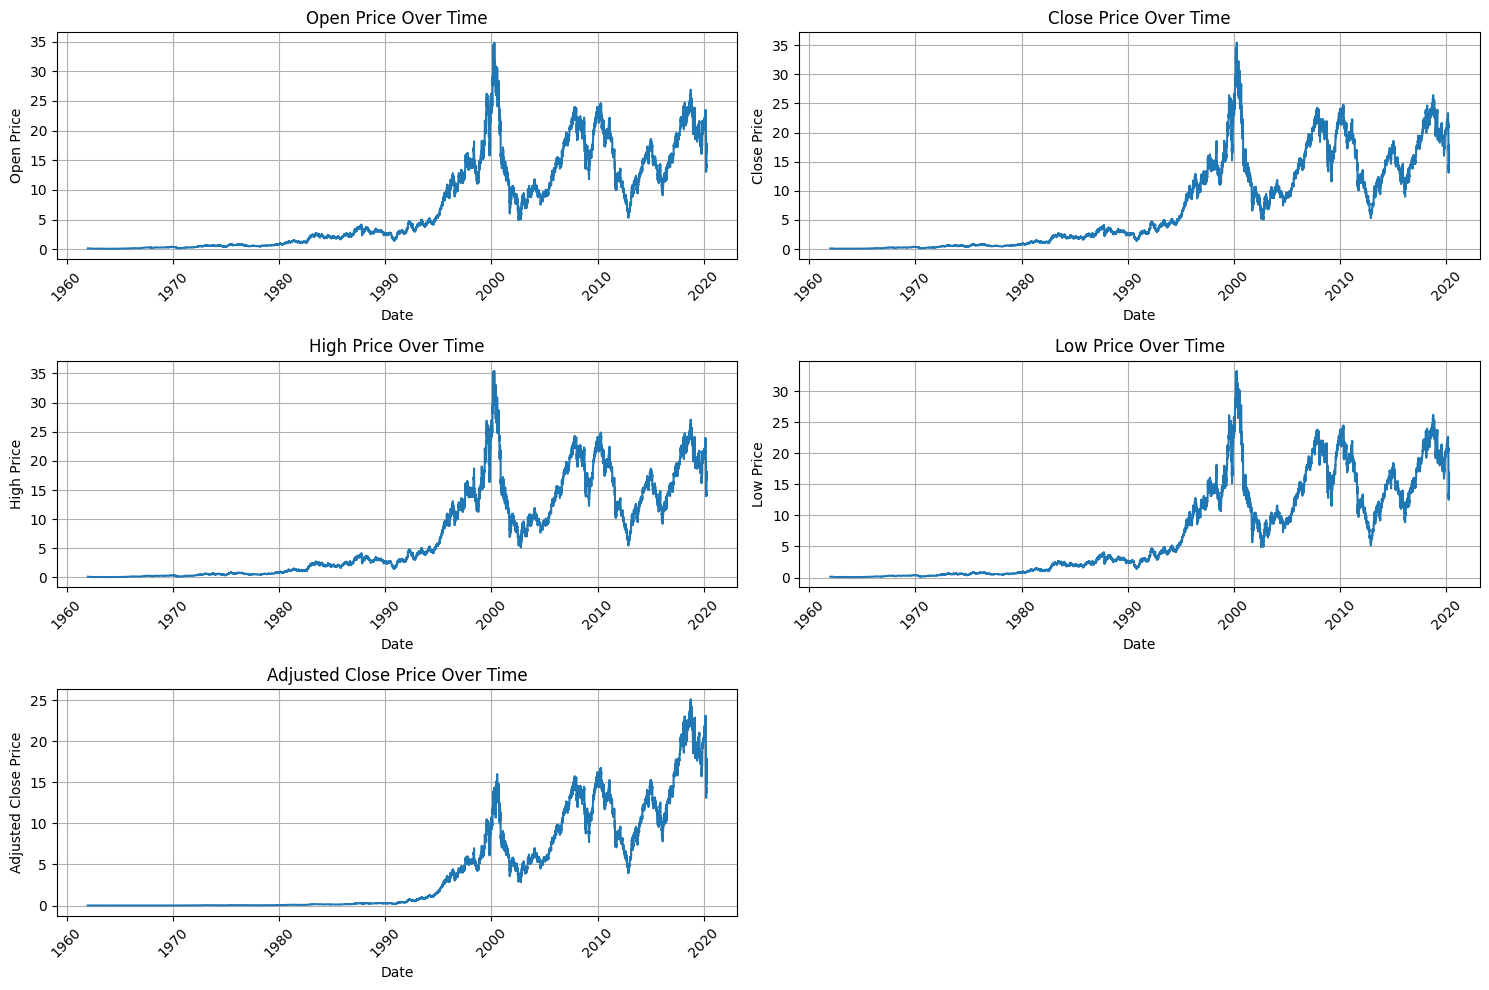

In [7]:

# Plot line graphs of Open, Close, High, Low, and Adj Close over time.
# Examine trends, seasonality, and anomalies in the data.

# Visualize Stock Prices
plt.figure(figsize=(15, 10))

# Open Price
plt.subplot(3, 2, 1)
plt.plot(data['Open'])
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.xticks(rotation=45)


# Close Price
plt.subplot(3, 2, 2)
plt.plot(data['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)

# High Price
plt.subplot(3, 2, 3)
plt.plot(data['High'])
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.xticks(rotation=45)

# Low Price
plt.subplot(3, 2, 4)
plt.plot(data['Low'])
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid(True)
plt.xticks(rotation=45)

# Adj Close Price
plt.subplot(3, 2, 5)
plt.plot(data['Adj Close'])
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

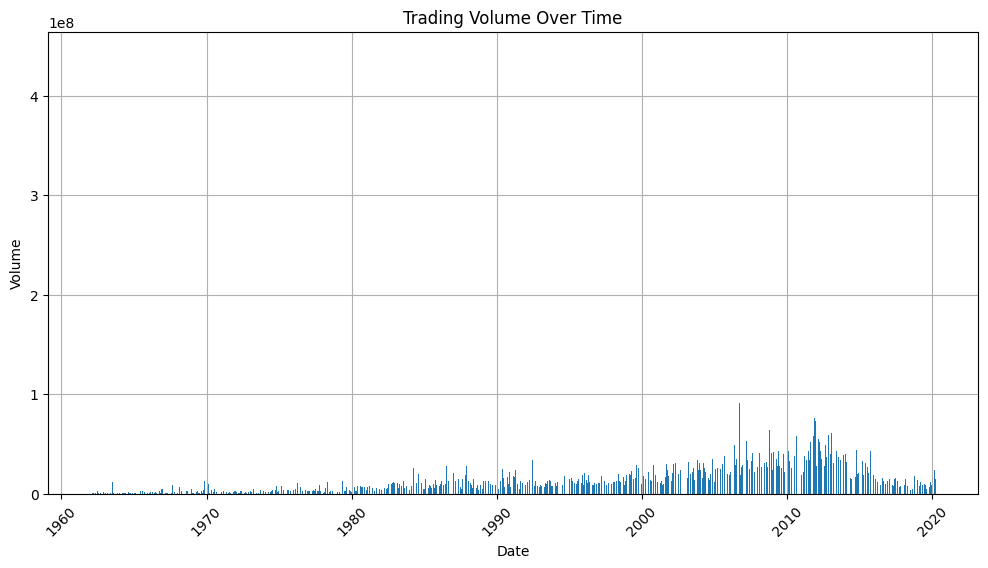

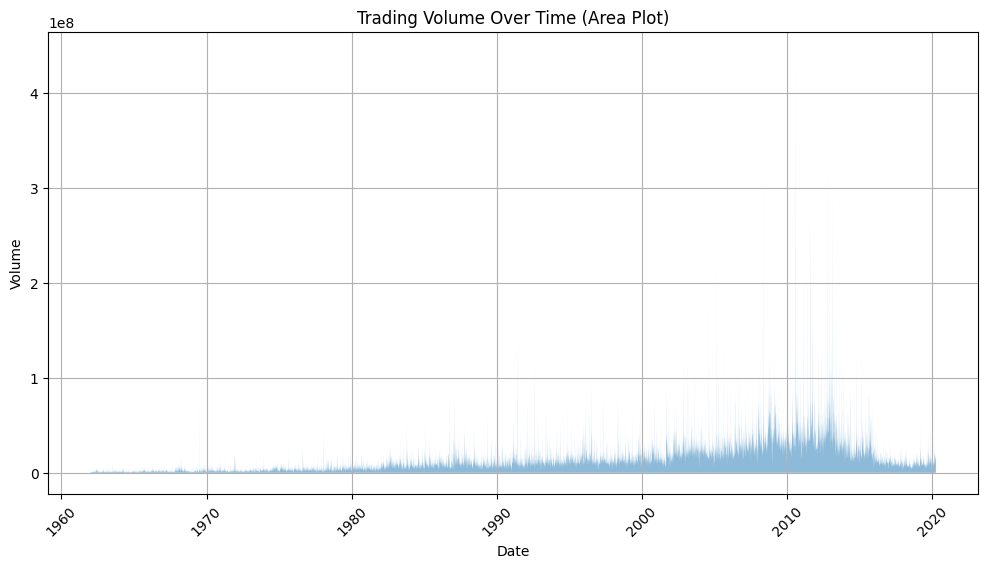

In [8]:

# Plot Volume over time to observe trading volume trends.
# Use bar plots or area plots to visualize daily or weekly trading volumes.

# Volume Analysis: Plot Volume over time to observe trading volume trends.
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# You can also use area plots to visualize volume
plt.figure(figsize=(12, 6))
plt.fill_between(data.index, data['Volume'], alpha=0.5)
plt.title('Trading Volume Over Time (Area Plot)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

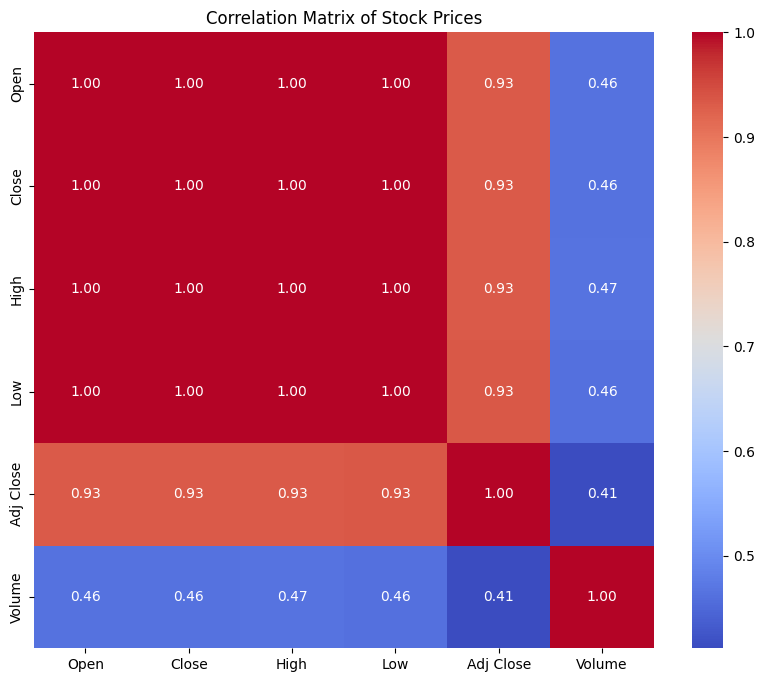

In [9]:

# Calculate the correlation matrix
correlation_matrix = data[['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Prices')
plt.show()

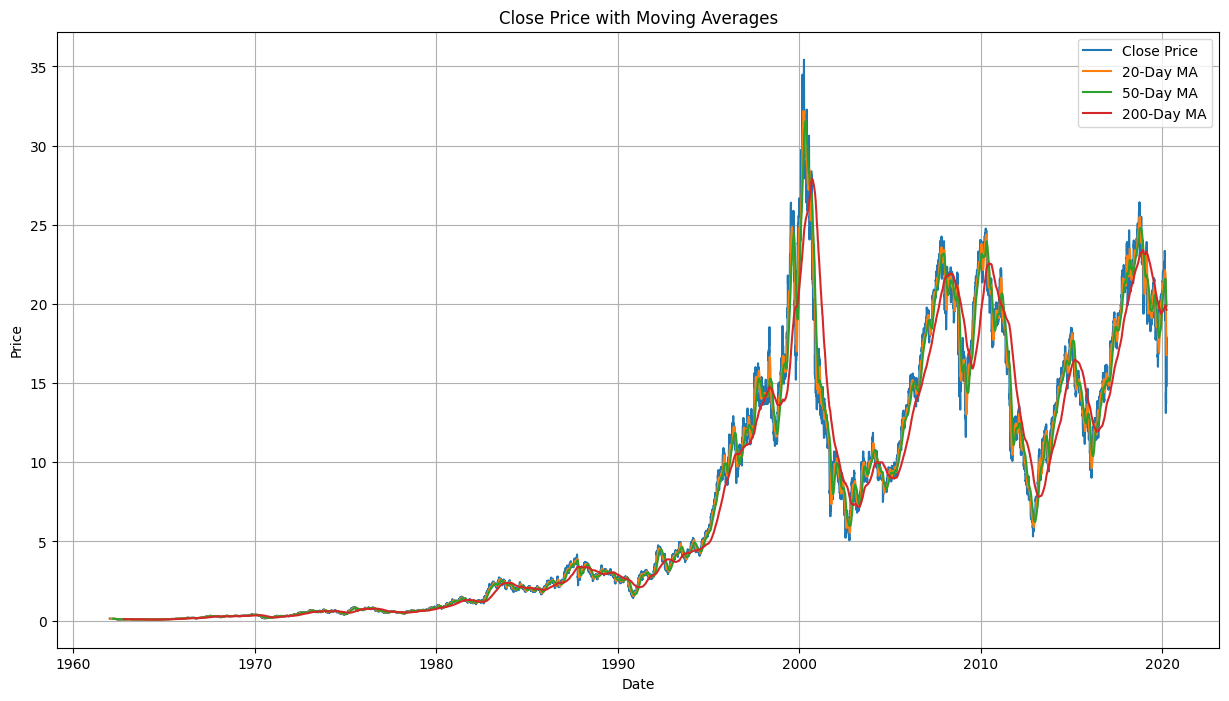

In [10]:

# Calculate moving averages (e.g., 20-day, 50-day, 200-day)
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot Close prices and moving averages
plt.figure(figsize=(15, 8))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA20'], label='20-Day MA')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# **Step 3: Feature Engineering**

In [11]:
# Date-Based Features:
# Year, Month, Day of Week, and Day of Year: Extract these from the Date column to capture any patterns or seasonality.
# Is Month Start/End: Create binary features to identify month-end or month-start days.

# Date-Based Features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['DayOfWeek'] = data.index.dayofweek
data['DayOfYear'] = data.index.dayofyear

# Is Month Start/End
data['IsMonthStart'] = data.index.is_month_start.astype(int)
data['IsMonthEnd'] = data.index.is_month_end.astype(int)

In [12]:
# Price Change Features:
# Daily Returns: Calculate daily returns
# Volatility: Calculate rolling standard deviation (e.g., 7-day, 30-day) of daily returns to capture short- and medium-term volatility.

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate rolling volatility (e.g., 7-day and 30-day)
data['Volatility_7D'] = data['Daily_Return'].rolling(window=7).std()
data['Volatility_30D'] = data['Daily_Return'].rolling(window=30).std()

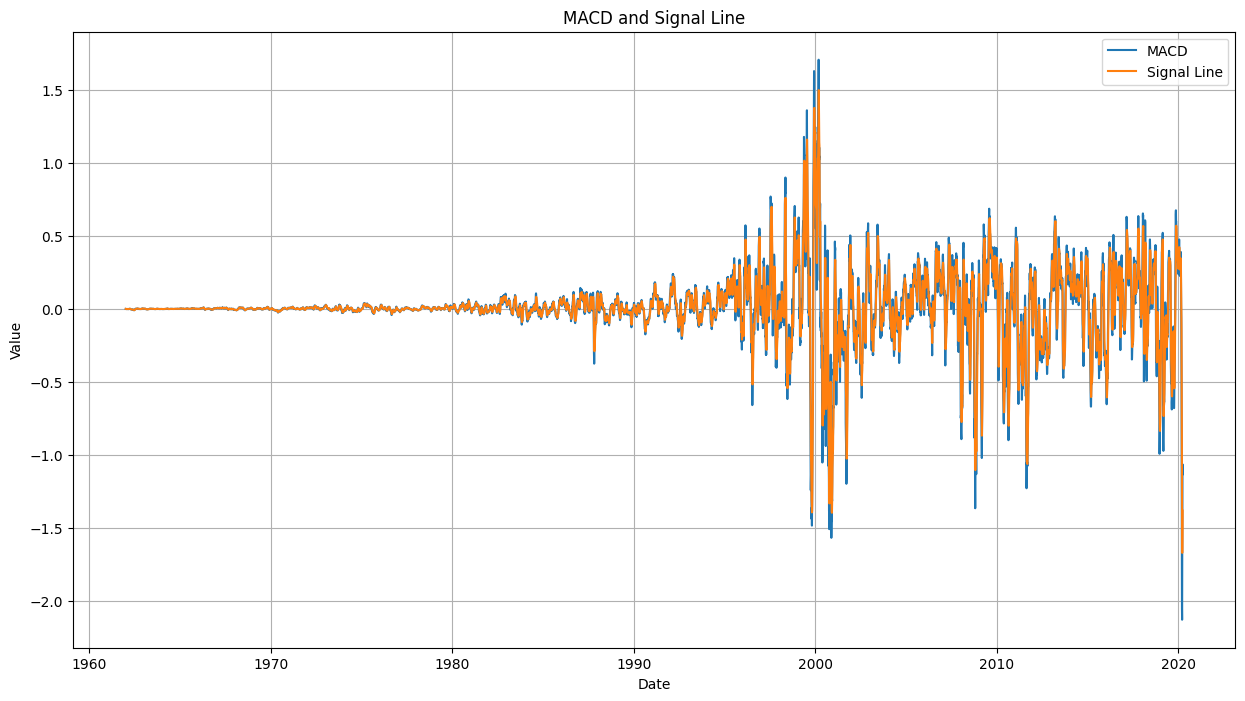

In [13]:
#  Moving Average Convergence Divergence (MACD):
# Calculate MACD as the difference between a 12-day EMA (Exponential Moving Average) and a 26-day EMA.
# Create an MACD signal line (9-day EMA of MACD) to show the direction and strength of the stock's momentum.

# Calculate the 12-day EMA
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-day EMA
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD
data['MACD'] = data['EMA12'] - data['EMA26']

# Calculate the signal line (9-day EMA of MACD)
data['MACD_Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD and Signal Line
plt.figure(figsize=(15, 8))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_Signal_Line'], label='Signal Line')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


                Close        RSI
Date                            
1962-01-02   0.124177        NaN
1962-01-03   0.122846        NaN
1962-01-04   0.120185        NaN
1962-01-05   0.117525        NaN
1962-01-08   0.119299        NaN
...               ...        ...
2020-03-26  17.940001  39.401349
2020-03-27  16.860001  43.000007
2020-03-30  17.840000  43.564355
2020-03-31  17.360001  43.421053
2020-04-01  14.840000  41.587902

[14663 rows x 2 columns]


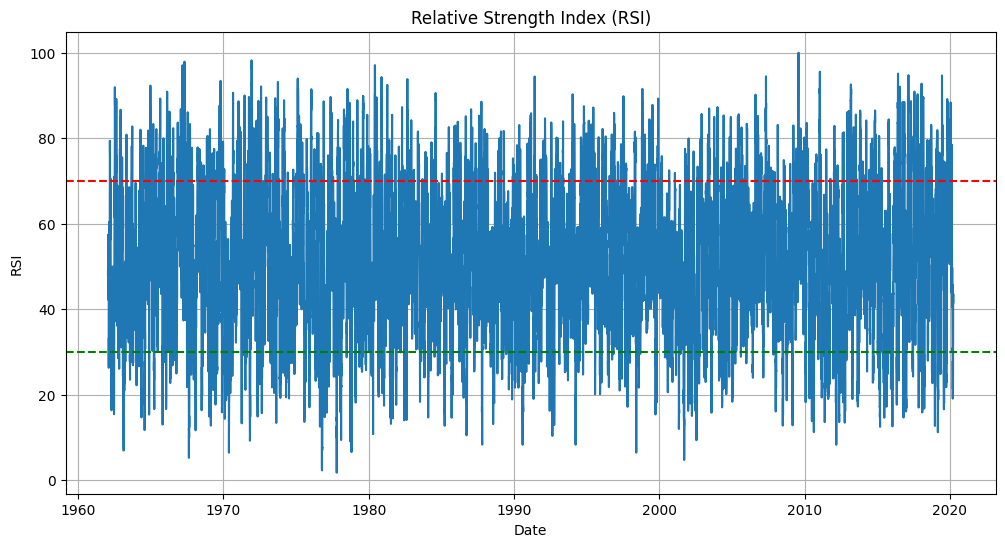

In [14]:
# Relative Strength Index (RSI):
# Calculate RSI over a 14-day period to assess overbought or oversold conditions.

def calculate_rsi(data, window=14):

  delta = data['Close'].diff()
  gain = (delta.where(delta > 0, 0)).fillna(0)
  loss = (-delta.where(delta < 0, 0)).fillna(0)

  avg_gain = gain.rolling(window=window, center=False).mean()
  avg_loss = loss.rolling(window=window, center=False).mean()

  rs = avg_gain / avg_loss
  rsi = 100 - (100 / (1 + rs))

  return rsi

# Calculate RSI with a 14-day window
data['RSI'] = calculate_rsi(data)

# Print the DataFrame with RSI
print(data[['Close', 'RSI']])

# You can also plot the RSI to visually identify overbought/oversold conditions
plt.figure(figsize=(12, 6))
plt.plot(data['RSI'])
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(y=70, color='r', linestyle='--')  # Overbought threshold
plt.axhline(y=30, color='g', linestyle='--')  # Oversold threshold
plt.grid(True)
plt.show()

                Close  RollingMean  UpperBand  LowerBand
Date                                                    
1962-01-02   0.124177          NaN        NaN        NaN
1962-01-03   0.122846          NaN        NaN        NaN
1962-01-04   0.120185          NaN        NaN        NaN
1962-01-05   0.117525          NaN        NaN        NaN
1962-01-08   0.119299          NaN        NaN        NaN
...               ...          ...        ...        ...
2020-03-26  17.940001      17.6780  23.879955  11.476045
2020-03-27  16.860001      17.4815  23.515046  11.447954
2020-03-30  17.840000      17.2805  22.957169  11.603831
2020-03-31  17.360001      17.1110  22.548898  11.673102
2020-04-01  14.840000      16.7730  21.865460  11.680540

[14663 rows x 4 columns]


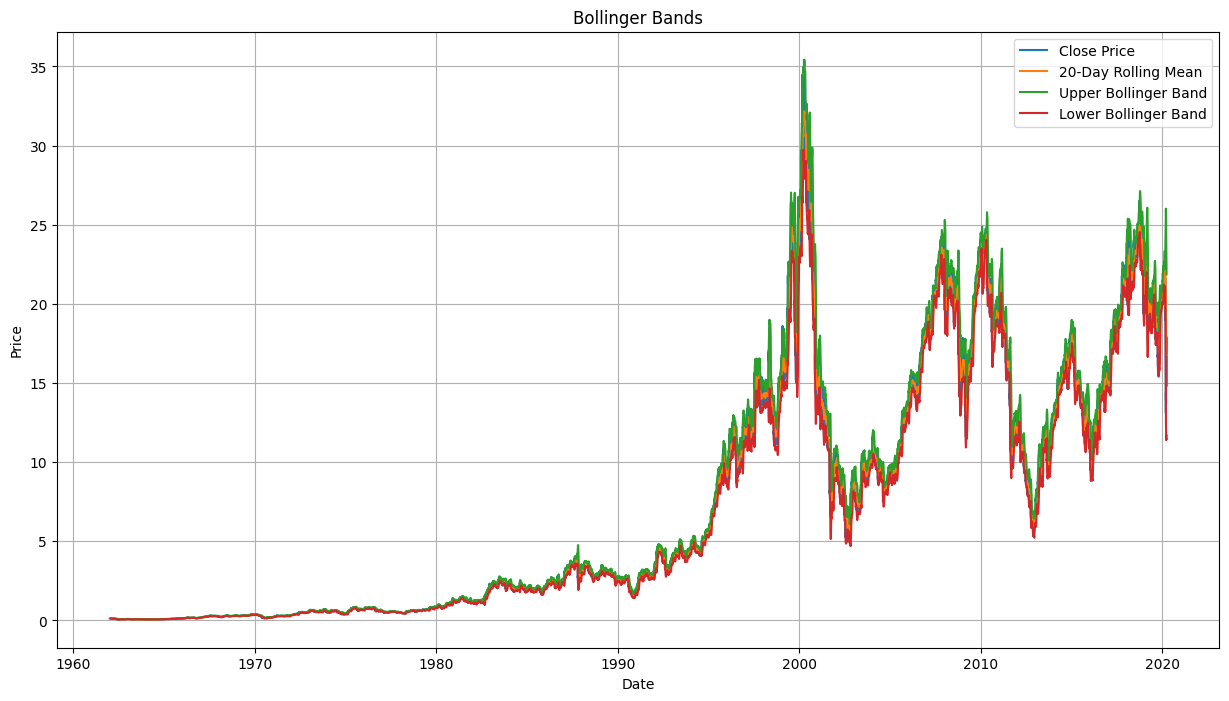

In [15]:
# Bollinger Bands:
# Calculate the 20-day rolling mean and standard deviation, then compute the upper and lower Bollinger Bands.

# Calculate the 20-day rolling mean and standard deviation
data['RollingMean'] = data['Close'].rolling(window=20).mean()
data['RollingStd'] = data['Close'].rolling(window=20).std()

# Compute the upper and lower Bollinger Bands
data['UpperBand'] = data['RollingMean'] + (data['RollingStd'] * 2)
data['LowerBand'] = data['RollingMean'] - (data['RollingStd'] * 2)

# Print the DataFrame with Bollinger Bands
print(data[['Close', 'RollingMean', 'UpperBand', 'LowerBand']])

# Plot Close prices, rolling mean, and Bollinger Bands
plt.figure(figsize=(15, 8))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['RollingMean'], label='20-Day Rolling Mean')
plt.plot(data['UpperBand'], label='Upper Bollinger Band')
plt.plot(data['LowerBand'], label='Lower Bollinger Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# **Step 4: Data Preparation for Decision Tree Regression**

In [16]:
# Lagged Features:
# Create lagged versions of Close, Volume, or daily returns (e.g., 1-day lag, 7-day lag) to provide the Decision Tree with previous day’s data as features.

# Lagged Features
for i in [1, 7]:  # Example: 1-day and 7-day lags
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)
    data[f'Volume_Lag_{i}'] = data['Volume'].shift(i)
    data[f'Daily_Return_Lag_{i}'] = data['Daily_Return'].shift(i)


# Remove rows with NaN values created by lagging
data.dropna(inplace=True)

print(data.isnull().sum())

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
MA20                  0
MA50                  0
MA200                 0
Year                  0
Month                 0
DayOfWeek             0
DayOfYear             0
IsMonthStart          0
IsMonthEnd            0
Daily_Return          0
Volatility_7D         0
Volatility_30D        0
EMA12                 0
EMA26                 0
MACD                  0
MACD_Signal_Line      0
RSI                   0
RollingMean           0
RollingStd            0
UpperBand             0
LowerBand             0
Close_Lag_1           0
Volume_Lag_1          0
Daily_Return_Lag_1    0
Close_Lag_7           0
Volume_Lag_7          0
Daily_Return_Lag_7    0
dtype: int64


In [17]:
#Drop Unnecessary Columns:

data.drop('Adj Close', axis=1, inplace=True)
print("Column 'Adj Close' has been dropped.")


# You can also drop the index if you're not using it as a feature
data.reset_index(drop=True, inplace=True)

Column 'Adj Close' has been dropped.


# **Step 4: Split Data into Training and Testing Sets**

In [18]:
# Train-Test Split:

# Define the split point (e.g., last 20% of data as test)
split_point = int(len(data) * 0.8)

# Split the data into training and test sets based on the index
train_data = data[:split_point]
test_data = data[split_point:]

# Define the target variable
target_variable = 'Close'

# Create X_train, y_train, X_test, y_test
X_train = train_data.drop(target_variable, axis=1)
y_train = train_data[target_variable]
X_test = test_data.drop(target_variable, axis=1)
y_test = test_data[target_variable]

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (11571, 31), (11571,)
Test set shape: (2893, 31), (2893,)


In [19]:
# drop all Unnecessary Columns from X_train & X_test  related or get from  Close and show them

# Identify columns related to 'Close'
close_related_columns = [col for col in X_train.columns if 'Close' in col or 'EMA' in col or 'MACD' in col or 'RSI' in col or 'RollingMean' in col or 'UpperBand' in col or 'LowerBand' in col or 'MA20' in col or 'MA50' in col or 'MA200' in col or 'RollingStd' in col or 'Daily_Return' in col or 'Volatility_7D' in col or 'Volatility_30D' in col or 'Daily_Return_Lag_1' in col or 'Daily_Return_Lag_7' in col]

# Show the columns
print("Columns related to 'Close':", close_related_columns)

# Drop the identified columns from X_train and X_test
X_train = X_train.drop(columns=close_related_columns)
X_test = X_test.drop(columns=close_related_columns)

print("\nUnnecessary columns related to 'Close' have been dropped from X_train and X_test.")

Columns related to 'Close': ['MA20', 'MA50', 'MA200', 'Daily_Return', 'Volatility_7D', 'Volatility_30D', 'EMA12', 'EMA26', 'MACD', 'MACD_Signal_Line', 'RSI', 'RollingMean', 'RollingStd', 'UpperBand', 'LowerBand', 'Close_Lag_1', 'Daily_Return_Lag_1', 'Close_Lag_7', 'Daily_Return_Lag_7']

Unnecessary columns related to 'Close' have been dropped from X_train and X_test.


In [20]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11571 entries, 0 to 11570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          11571 non-null  float64
 1   High          11571 non-null  float64
 2   Low           11571 non-null  float64
 3   Volume        11571 non-null  int64  
 4   Year          11571 non-null  int32  
 5   Month         11571 non-null  int32  
 6   DayOfWeek     11571 non-null  int32  
 7   DayOfYear     11571 non-null  int32  
 8   IsMonthStart  11571 non-null  int64  
 9   IsMonthEnd    11571 non-null  int64  
 10  Volume_Lag_1  11571 non-null  float64
 11  Volume_Lag_7  11571 non-null  float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 904.1 KB


# **Step 5: Train the Decision Tree Regressor with Hyperparameter Tuning**

In [21]:
from sklearn.model_selection import GridSearchCV

# Set up a Decision Tree Regressor and tune hyperparameters using GridSearchCV
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model after tuning
best_dt_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


# **Step 6: Evaluate the Model**

In [22]:

# Predict on the test set
y_pred = best_dt_model.predict(X_test)

# Calculate and display performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.5877582337385929
R² Score: 0.9728058782655626


# **Step 7: Feature Importance Visualization (Optional)**

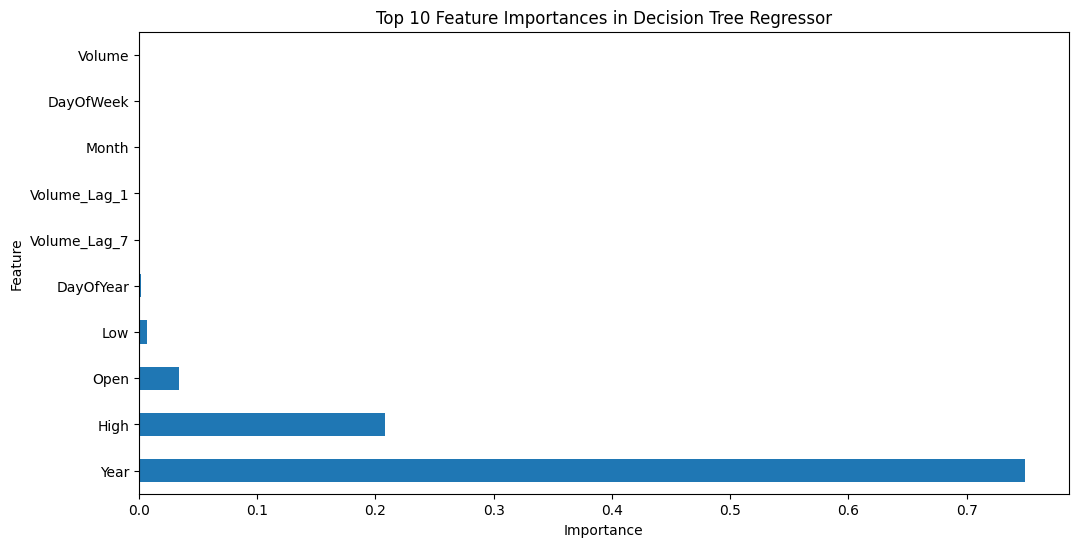

In [23]:
# Plot feature importances
plt.figure(figsize=(12, 6))
# Get feature names from X_train to ensure consistency
feature_names = X_train.columns
feature_importances = pd.Series(best_dt_model.feature_importances_, index=feature_names)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Decision Tree Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [27]:

# Step 8: Save the Trained Model
filename = 'hp_stock_prediction_model.sav'
joblib.dump(best_dt_model, filename)

# Step 9: Load the Saved Model
loaded_model = joblib.load(filename)

# Step 10: Make Predictions on New Data

# Create a new DataFrame with the same features as used in training.
# Replace the example with your actual new data.
new_data = pd.DataFrame({
    'Open': [10.5, 10.7, 10.9],
    'High': [11.0, 11.2, 11.5],
    'Low': [10.2, 10.4, 10.6],
    'Volume': [100000, 110000, 120000],
    'Year': [2050, 2023, 2023],
    'Month': [10, 10, 10],
    'DayOfWeek': [0, 1, 2],
    'DayOfYear': [273, 274, 275],
    'IsMonthStart': [0, 0, 0],
    'IsMonthEnd': [0, 0, 0],
    'Volume_Lag_1': [90000, 100000, 110000],
    'Volume_Lag_7': [80000, 90000, 100000]
})


# Make predictions
new_predictions = loaded_model.predict(new_data)

print("Predictions for new data:", new_predictions)

Predictions for new data: [10.76294231 10.76294231 10.76294231]
